In [1]:
#Import libraries

import numpy as np
import pandas as pd
from hmmlearn import hmm
import warnings
from constants import *
import math
import matplotlib.pyplot as plt
import collections, operator
warnings.filterwarnings("ignore")

In [13]:
DIMENSION = 3
def plot_cluster(cluster, Z, X):
    fig = plt.subplot(111)
    var_plot_list = CDRPKM_LIST
    count=0
    for i in range(len(X)):
        if(Z[i] == cluster):
            fig.plot(CDRPKM_LIST, X[i])
            count+=1
    title = "HMM "+ str(cluster) + " : " + str(count) + " points "
    plt.title(title)
    plt.show()
    
def fit_HMM(components, covariance):
    clf = hmm.GaussianHMM(n_components=components,covariance_type=covariance) #consider Gaussian Emissions
    return clf

def BIC(model,X):
    LogLikelihood = model.score(X)
    num_hidden_states = model.n_components
    # D counts transition matrix, emission matrix, sequences estimated (Z), covariance matrix
    D = ((num_hidden_states*(num_hidden_states+1))/2) + num_hidden_states**2 + DIMENSION*len(X)
    BIC = LogLikelihood - (D/2)*np.log(len(X))
    return BIC

def plot_BIC(list_k, BIC_score):
    fig = plt.subplot(111)
    plt.plot(list_k, BIC_score, marker='o')  
    plt.xlabel('Value of K')
    plt.ylabel('Objective')
    plt.title('BIC')
    plt.show()   

In [3]:
#Dataset

df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Dataset size is",len(df_main))
print(df_main.head(5))
X = np.log2(df_main.values)

print("****************************")
print("First 5 log2 values\n",X[:5])

Dataset size is 11087
     cdRPKM0    cdRPKM1    cdRPKM2
0   8.539825   5.879642   5.990043
1  13.837680   4.128452   6.882499
2  39.456786  62.505536  84.519655
3   2.104887   3.488833   2.908098
4  10.010800  17.066902   9.484017
****************************
First 5 log2 values
 [[ 3.09420655  2.55572822  2.58256628]
 [ 3.79053016  2.04560095  2.78293239]
 [ 5.30220154  5.96591207  6.40121497]
 [ 1.07374244  1.80274443  1.54007587]
 [ 3.32348535  4.09312932  3.24549826]]


In [4]:
print(X.shape)
print(X[0])

(11087, 3)
[ 3.09420655  2.55572822  2.58256628]


In [5]:
#Fit HMM

remodel = fit_HMM(7,'full')
remodel.fit(X) #get sequence of states using Viterbi
Z = remodel.predict(X)

In [6]:
print("Hidden states samples")
counts = {}

for idx,i in enumerate(Z):
    if(idx%1000==0):
        print("State of", idx, " is ",i)
    if(i not in counts):
        counts[i]=1
    else:
        counts[i]+=1
        
print("Counts of each state are")
for i in range(0,len(counts)):
    print("HMM State",i,":",counts[i])

Hidden states samples
State of 0  is  5
State of 1000  is  6
State of 2000  is  6
State of 3000  is  0
State of 4000  is  6
State of 5000  is  1
State of 6000  is  4
State of 7000  is  4
State of 8000  is  0
State of 9000  is  5
State of 10000  is  5
State of 11000  is  0
Counts of each state are
HMM State 0 : 2229
HMM State 1 : 1056
HMM State 2 : 1926
HMM State 3 : 1338
HMM State 4 : 641
HMM State 5 : 1887
HMM State 6 : 2010


In [7]:
print("Transition matrix")
print(remodel.transmat_)
print()

Transition matrix
[[ 0.19175383  0.0915731   0.18904333  0.1358402   0.06727392  0.16826674
   0.15624888]
 [ 0.1705784   0.11016471  0.18124941  0.13748227  0.07479522  0.1514818
   0.17424818]
 [ 0.19168649  0.09794059  0.18752858  0.13809145  0.06557445  0.16232567
   0.15685277]
 [ 0.16827525  0.11607069  0.17241122  0.14460131  0.07539009  0.15729363
   0.16595781]
 [ 0.13875591  0.12990326  0.13136472  0.13977253  0.20286699  0.13871536
   0.11862122]
 [ 0.18274455  0.10673795  0.18140745  0.13678322  0.06894379  0.16888119
   0.15450186]
 [ 0.18648422  0.11146747  0.18196482  0.14062225  0.06910087  0.15538335
   0.15497702]]



In [8]:
print("Means and vars of each hidden state")
for i in range(remodel.n_components):
    print("Hidden state {0}".format(i))
    print("mean = ", remodel.means_[i])
    print("var = ", remodel.covars_[i])
    print()

Means and vars of each hidden state
Hidden state 0
mean =  [ 3.57280568  3.69248485  3.82274226]
var =  [[ 1.51052485  1.21950801  1.14101031]
 [ 1.21950801  1.37729964  1.18119003]
 [ 1.14101031  1.18119003  1.28127006]]

Hidden state 1
mean =  [ 1.22061848  1.02195758  0.97343835]
var =  [[ 2.6036217   1.92409405  1.65308722]
 [ 1.92409405  2.53975147  1.50805208]
 [ 1.65308722  1.50805208  2.32493688]]

Hidden state 2
mean =  [ 4.17438003  4.32895442  4.36509249]
var =  [[ 1.57489172  1.3999832   1.30276202]
 [ 1.3999832   1.53566901  1.37527866]
 [ 1.30276202  1.37527866  1.40950291]]

Hidden state 3
mean =  [ 1.74981729  2.00627386  2.42809481]
var =  [[ 2.41346526  1.42685782  1.42297088]
 [ 1.42685782  2.03730591  1.48394551]
 [ 1.42297088  1.48394551  1.75708661]]

Hidden state 4
mean =  [ 6.28887192  6.49422981  6.25722634]
var =  [[ 3.34547097  3.14904845  2.85038334]
 [ 3.14904845  3.08318245  2.81216335]
 [ 2.85038334  2.81216335  2.68654264]]

Hidden state 5
mean =  [ 3.10

In [9]:
for idx, hidden_state in enumerate(remodel.covars_):
    print("For hidden state",idx)
    rho_12 = hidden_state[0][1]/math.sqrt(hidden_state[0][0]*hidden_state[1][1])
    print("Rho12:",rho_12)
    rho_23 = hidden_state[1][2]/math.sqrt(hidden_state[1][1]*hidden_state[2][2])
    print("Rho23",rho_23)
    rho_13 = hidden_state[0][2]/math.sqrt(hidden_state[0][0]*hidden_state[2][2])
    print("Rho13:",rho_13)
    print("Rho12*Rho23:", rho_12*rho_23)
    print("****************************\n")

For hidden state 0
Rho12: 0.845486159009
Rho23 0.889170850711
Rho13: 0.82017267084
Rho12*Rho23: 0.751781647271
****************************

For hidden state 1
Rho12: 0.74824141746
Rho23 0.620604822664
Rho13: 0.671894745125
Rho12*Rho23: 0.464362232193
****************************

For hidden state 2
Rho12: 0.900220016006
Rho23 0.934778911702
Rho13: 0.874393161166
Rho12*Rho23: 0.841506686854
****************************

For hidden state 3
Rho12: 0.643475554529
Rho23 0.784319919523
Rho13: 0.691001359938
Rho12*Rho23: 0.504690695143
****************************

For hidden state 4
Rho12: 0.980507901323
Rho23 0.97711136147
Rho13: 0.950775034155
Rho12*Rho23: 0.958065410394
****************************

For hidden state 5
Rho12: 0.808704861437
Rho23 0.801667476716
Rho13: 0.797638355631
Rho12*Rho23: 0.648312385676
****************************

For hidden state 6
Rho12: 0.933415344482
Rho23 0.962207226352
Rho13: 0.908236476172
Rho12*Rho23: 0.898138989648
****************************



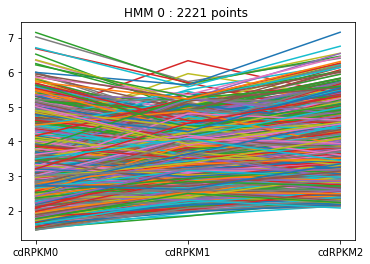

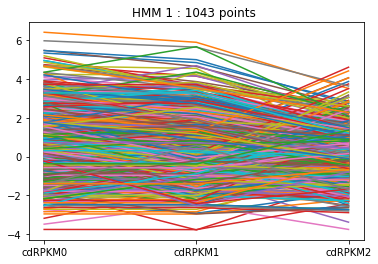

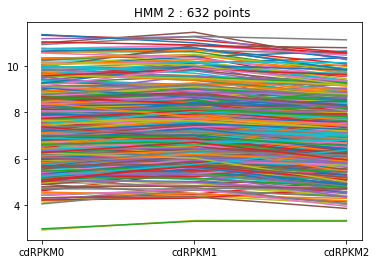

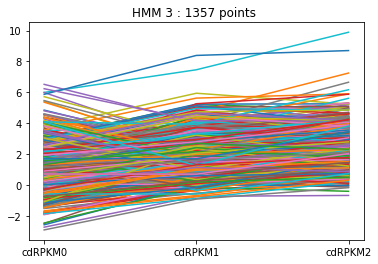

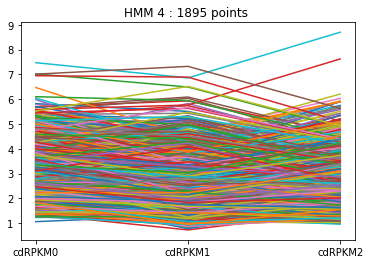

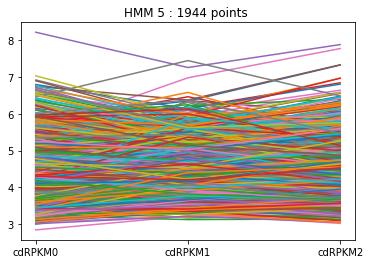

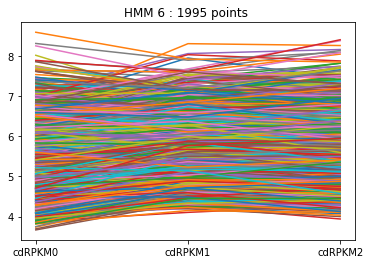

In [10]:
for i in range(0,remodel.n_components):
    plot_cluster(i,Z,X)
    print('\n')

In [11]:
fitted_clusters = []
# Append empty clusters
for i in range(0,remodel.n_components):
    fitted_clusters.append([])
    
for idx, i in enumerate(Z):
    fitted_clusters[Z[idx]].append(list(X[idx]))
    
for i in range(0,3):
    dataframe = pd.DataFrame(np.array(fitted_clusters[i]), columns = list("012"))
    print("Descriptive statistics for cluster", i+1, "is")
    print(dataframe.describe())
    print("*************************************************************************")
    print("*************************************************************************")
    print("*************************************************************************")

Descriptive statistics for cluster 1 is
                 0            1            2
count  2221.000000  2221.000000  2221.000000
mean      3.223996     3.453814     3.680191
std       0.879616     0.665511     0.766684
min       1.441401     1.838556     2.073887
25%       2.629965     2.990560     3.132007
50%       3.108012     3.396766     3.589109
75%       3.699928     3.857974     4.156998
max       7.145487     6.330169     7.152166
*************************************************************************
*************************************************************************
*************************************************************************
Descriptive statistics for cluster 2 is
                 0            1            2
count  1043.000000  1043.000000  1043.000000
mean      0.858069     0.518177     0.322287
std       1.516079     1.523746     1.145674
min      -3.751284    -3.775287    -3.750181
25%      -0.139914    -0.604118    -0.385875
50%       0.928869     

In [29]:
print(BIC(remodel,X))

-200443.836828


In [11]:
K_values = range(1,10,1)
BIC_scores = []
HMM_models = []
for i in range(1,10):
    model = fit_HMM(i,'full')
    model.fit(X) #get sequence of states using Viterbi
    HMM_models.append(model)
    BIC_scores.append(BIC(model,X))

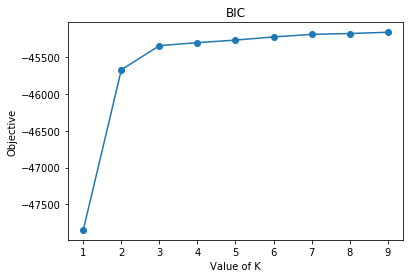

In [12]:
plot_BIC(K_values,BIC_scores)